## EUKulele database stats
SHU 10-07-2020

In [1]:
library(tidyverse); library(cowplot); library(ggalluvial)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
head(mmetsp)

X,CYVERSE_PATH,Source_ID_dup,REF_STATUS,Source_ID,Strain,Supergroup,Division,Class,Order,Family,Genus,Species,Notes
0,2225,MMETSP0290,Clean,MMETSP0290,CCMP2878,Alveolata,Apicomplexa,Colpodellidea,Colpodellida,Chromeraceae,Chromera,Chromera velia,Curated by J. del Campo (PR2)
1,2224,MMETSP0288,Clean,MMETSP0288,CCMP3155,Alveolata,Apicomplexa,Colpodellidea,Vitrelladida,Vitrellaceae,Vitrella,Vitrella brassicaformis,Adl et al. 2019; Curated by J. del Campo and Vaulot D. (PR2)
2,2282,MMETSP1451,Clean,MMETSP1451,CCMP3346,Alveolata,Apicomplexa,Colpodellidea,Vitrelladida,Vitrellaceae,Vitrella,Vitrella brassicaformis,Adl et al. 2019; Curated by J. del Campo and Vaulot D. (PR2)
3,1822,MMETSP0372,Clean,MMETSP0372,Grappler Inlet BC,Alveolata,Apicomplexa,Gregarinomorphea,Eugregarinorida,Lecudinidae,Lankesteria,Lankesteria abbottii,Adl et al. 2019; Curated by J. del Campo (PR2)
4,1740,MMETSP0125,Clean,MMETSP0125,ATCC 50986,Alveolata,Ciliophora,Colpodea,Colpodea_X,Cyrtolophosidida,Aristerostoma,Aristerostoma sp.,Ciliophora EukRef curation Boscaro V.; previously used Lynn 2008 (p 404)
5,1732,MMETSP0127,Clean,MMETSP0127,WH,Alveolata,Ciliophora,Colpodea,Colpodea_X,Platyophryida,Platyophrya,Platyophrya macrostoma,Ciliophora EukRef curation Boscaro V.; previously used Lynn 2008 (p 404)


In [3]:
# Import databases to explore
# mmetsp
mmetsp <- read.delim("/vortexfs1/omics/alexander/shu/db/mmetsp/tax-table.txt")

# phylodb
phylodb <- read.delim("/vortexfs1/omics/alexander/shu/db/phylodb/tax-table.txt")

# eukprot
eukprot <- read.delim("/vortexfs1/omics/alexander/shu/db/eukprot/tax-table.txt")

#Eukzoo
eukzoo <- read.delim("/vortexfs1/omics/alexander/shu/db/eukzoo/taxonomy-table.txt")

In [8]:
# # Function to print stats on each database
db_stats <- function(db_df){
    writeLines(paste(dim(db_df)[1], "total entries in database."))
    # EUKulele taxonomic level designations:
    tld <- c("Strain", "Supergroup", "Division", "Class", "Order", "Family", "Genus", "Species",
            "Genus_UniEuk", "Epithet_UniEuk", "Supergroup_UniEuk", "Taxogroup_UniEuk")
#     tmp <- db_df %>% 
#         select((tld))
    tmp_avail <- names(db_df)[names(db_df) %in% tld]
    tmp <- db_df[, tmp_avail]
    as.character(unique(tmp$Supergroup))
    writeLines(paste("Total unique strains", length(unique(tmp$Strain))))
    writeLines(paste("Total unique species", length(unique(tmp$Species))))
}

# Function to search database for taxa of interest
## Uses regular expression in string
## set equal to new R object to save list
db_search <- function(db_df, query_tax, output){
    out <- db_df %>% 
        filter_all(any_vars(str_detect(., pattern = query_tax))) %>% 
        data.frame
    writeLines(paste("Found", dim(out)[1], "matching IDs"))
    return(out)
}

In [9]:
# Print stats
db_stats(mmetsp)
db_stats(phylodb)
db_stats(eukzoo)
db_stats(eukprot)
# How many Dictyochophyceae entries? # Print a preview
# db_search(mmetsp, "Dicty")

678 total entries in database.
Total unique strains 405
Total unique species 316
25992 total entries in database.
Total unique strains 0
Total unique species 25992
739 total entries in database.
Total unique strains 441
Total unique species 361
742 total entries in database.
Total unique strains 621
Total unique species 0


In [34]:
names(mmetsp)
names(phylodb)
names(eukzoo)
names(eukprot)

[1] "X"             "CYVERSE_PATH"  "Source_ID_dup" "REF_STATUS"   
 [5] "Source_ID"     "Strain"        "Supergroup"    "Division"     
 [9] "Class"         "Order"         "Family"        "Genus"        
[13] "Species"       "Notes"

[1] "X"          "Source_ID"  "Supergroup" "Division"   "Class"     
[6] "Order"      "Family"     "Genus"      "Species"

[1] "Source_ID"  "Strain"     "Supergroup" "Phylum"     "Class"     
 [6] "Order"      "Family"     "Genus"      "Species"    "Notes"

[1] "X"                    "EukProt_ID"           "Name_to_Use"         
 [4] "Strain"               "Previous_Names"       "Replaces_EukProt_ID" 
 [7] "Genus_UniEuk"         "Epithet_UniEuk"       "Supergroup_UniEuk"   
[10] "Taxogroup_UniEuk"     "Taxonomy_UniEuk"      "Merged_Strains"      
[13] "Data_Source_URL"      "Data_Source_Name"     "Paper_DOI"           
[16] "Actions_Prior_to_Use" "Data_Source_Type"     "Notes"

In [35]:
# MMETSP
unique(mmetsp$Supergroup)

[1] Alveolata      Amoebozoa      Archaeplastida Hacrobia       Excavata      
[6] Opisthokonta   Rhizaria       Stramenopiles 
8 Levels: Alveolata Amoebozoa Archaeplastida Excavata ... Stramenopiles

`summarise()` ungrouping output (override with `.groups` argument)


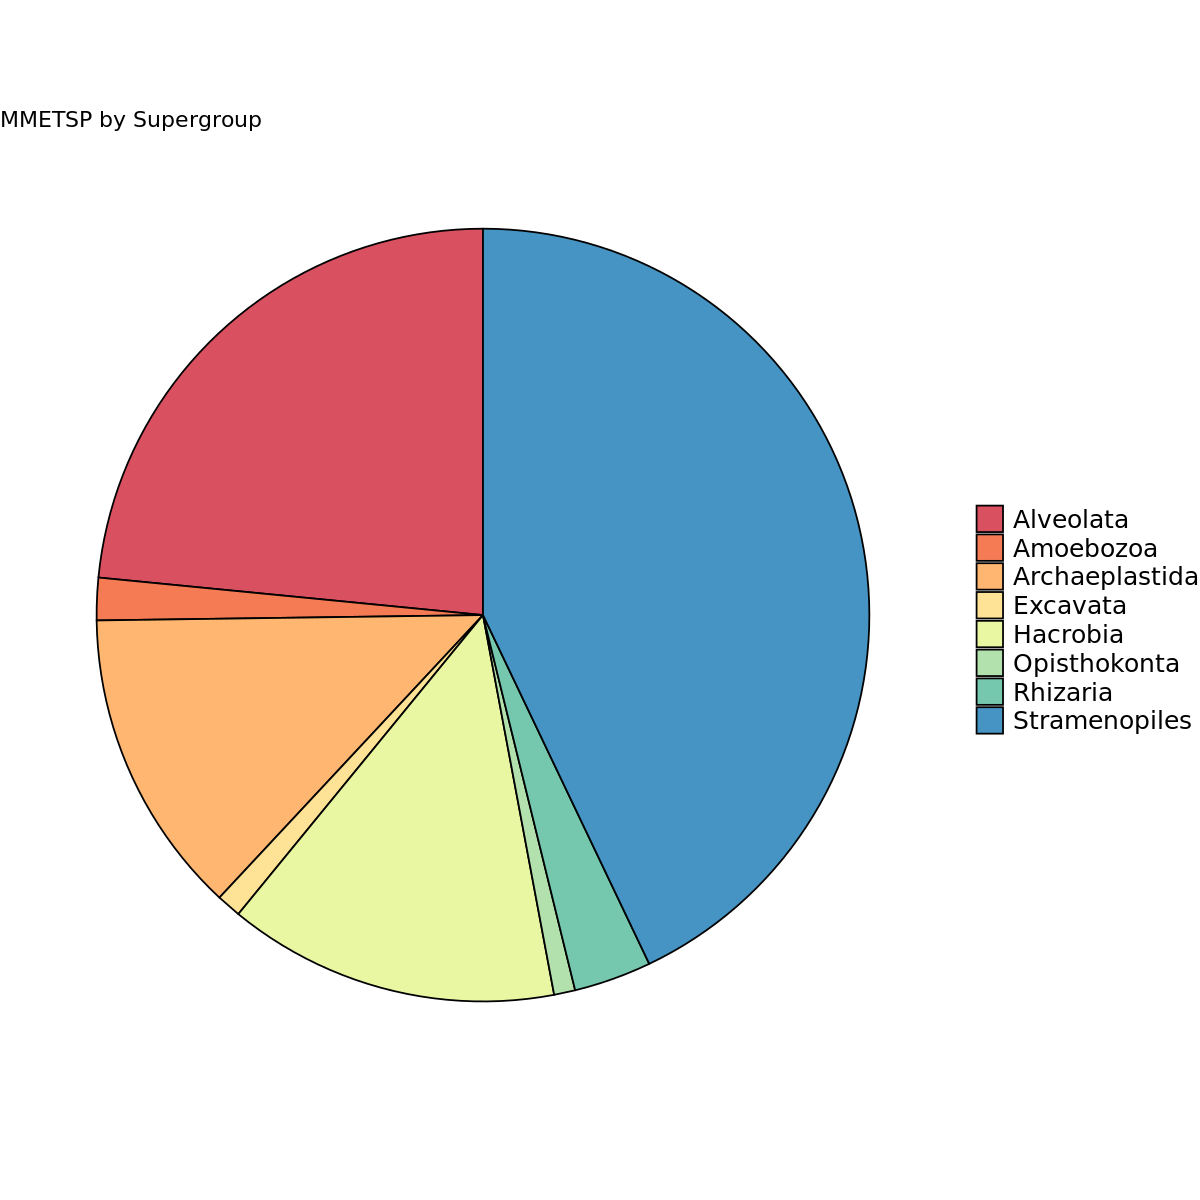

In [12]:
# Pie chart representation of mmetsp database
options(repr.plot.width = 10, repr.plot.height = 10) # Set plot output space
mmetsp %>% 
    select(Supergroup) %>% 
    add_column(freq = 1) %>% 
    group_by(Supergroup) %>% 
    summarise(FREQ = sum(freq)) %>% 
    pivot_longer(cols = c(Supergroup), names_to = "LEVELS") %>%
        ggplot(aes(x = LEVELS, fill = value, y = FREQ)) +
            geom_bar(stat = "identity", position = "stack", color = "black", alpha = 0.9) +
            coord_polar("y", start = 0) +
            scale_fill_brewer(palette = "Spectral") +
            theme_void() +
            theme(legend.title = element_blank(),
                 legend.text = element_text(size = 15)) +
            labs(title = "MMETSP by Supergroup")

In [14]:
# Prep mmetsp database to plot distribution
tld <- c("Strain", "Supergroup", "Division", "Class", "Order", "Family", "Genus", "Species",
            "Genus_UniEuk", "Epithet_UniEuk", "Supergroup_UniEuk", "Taxogroup_UniEuk")
mmetsp_plot <- mmetsp %>% 
    select(any_of(tld))

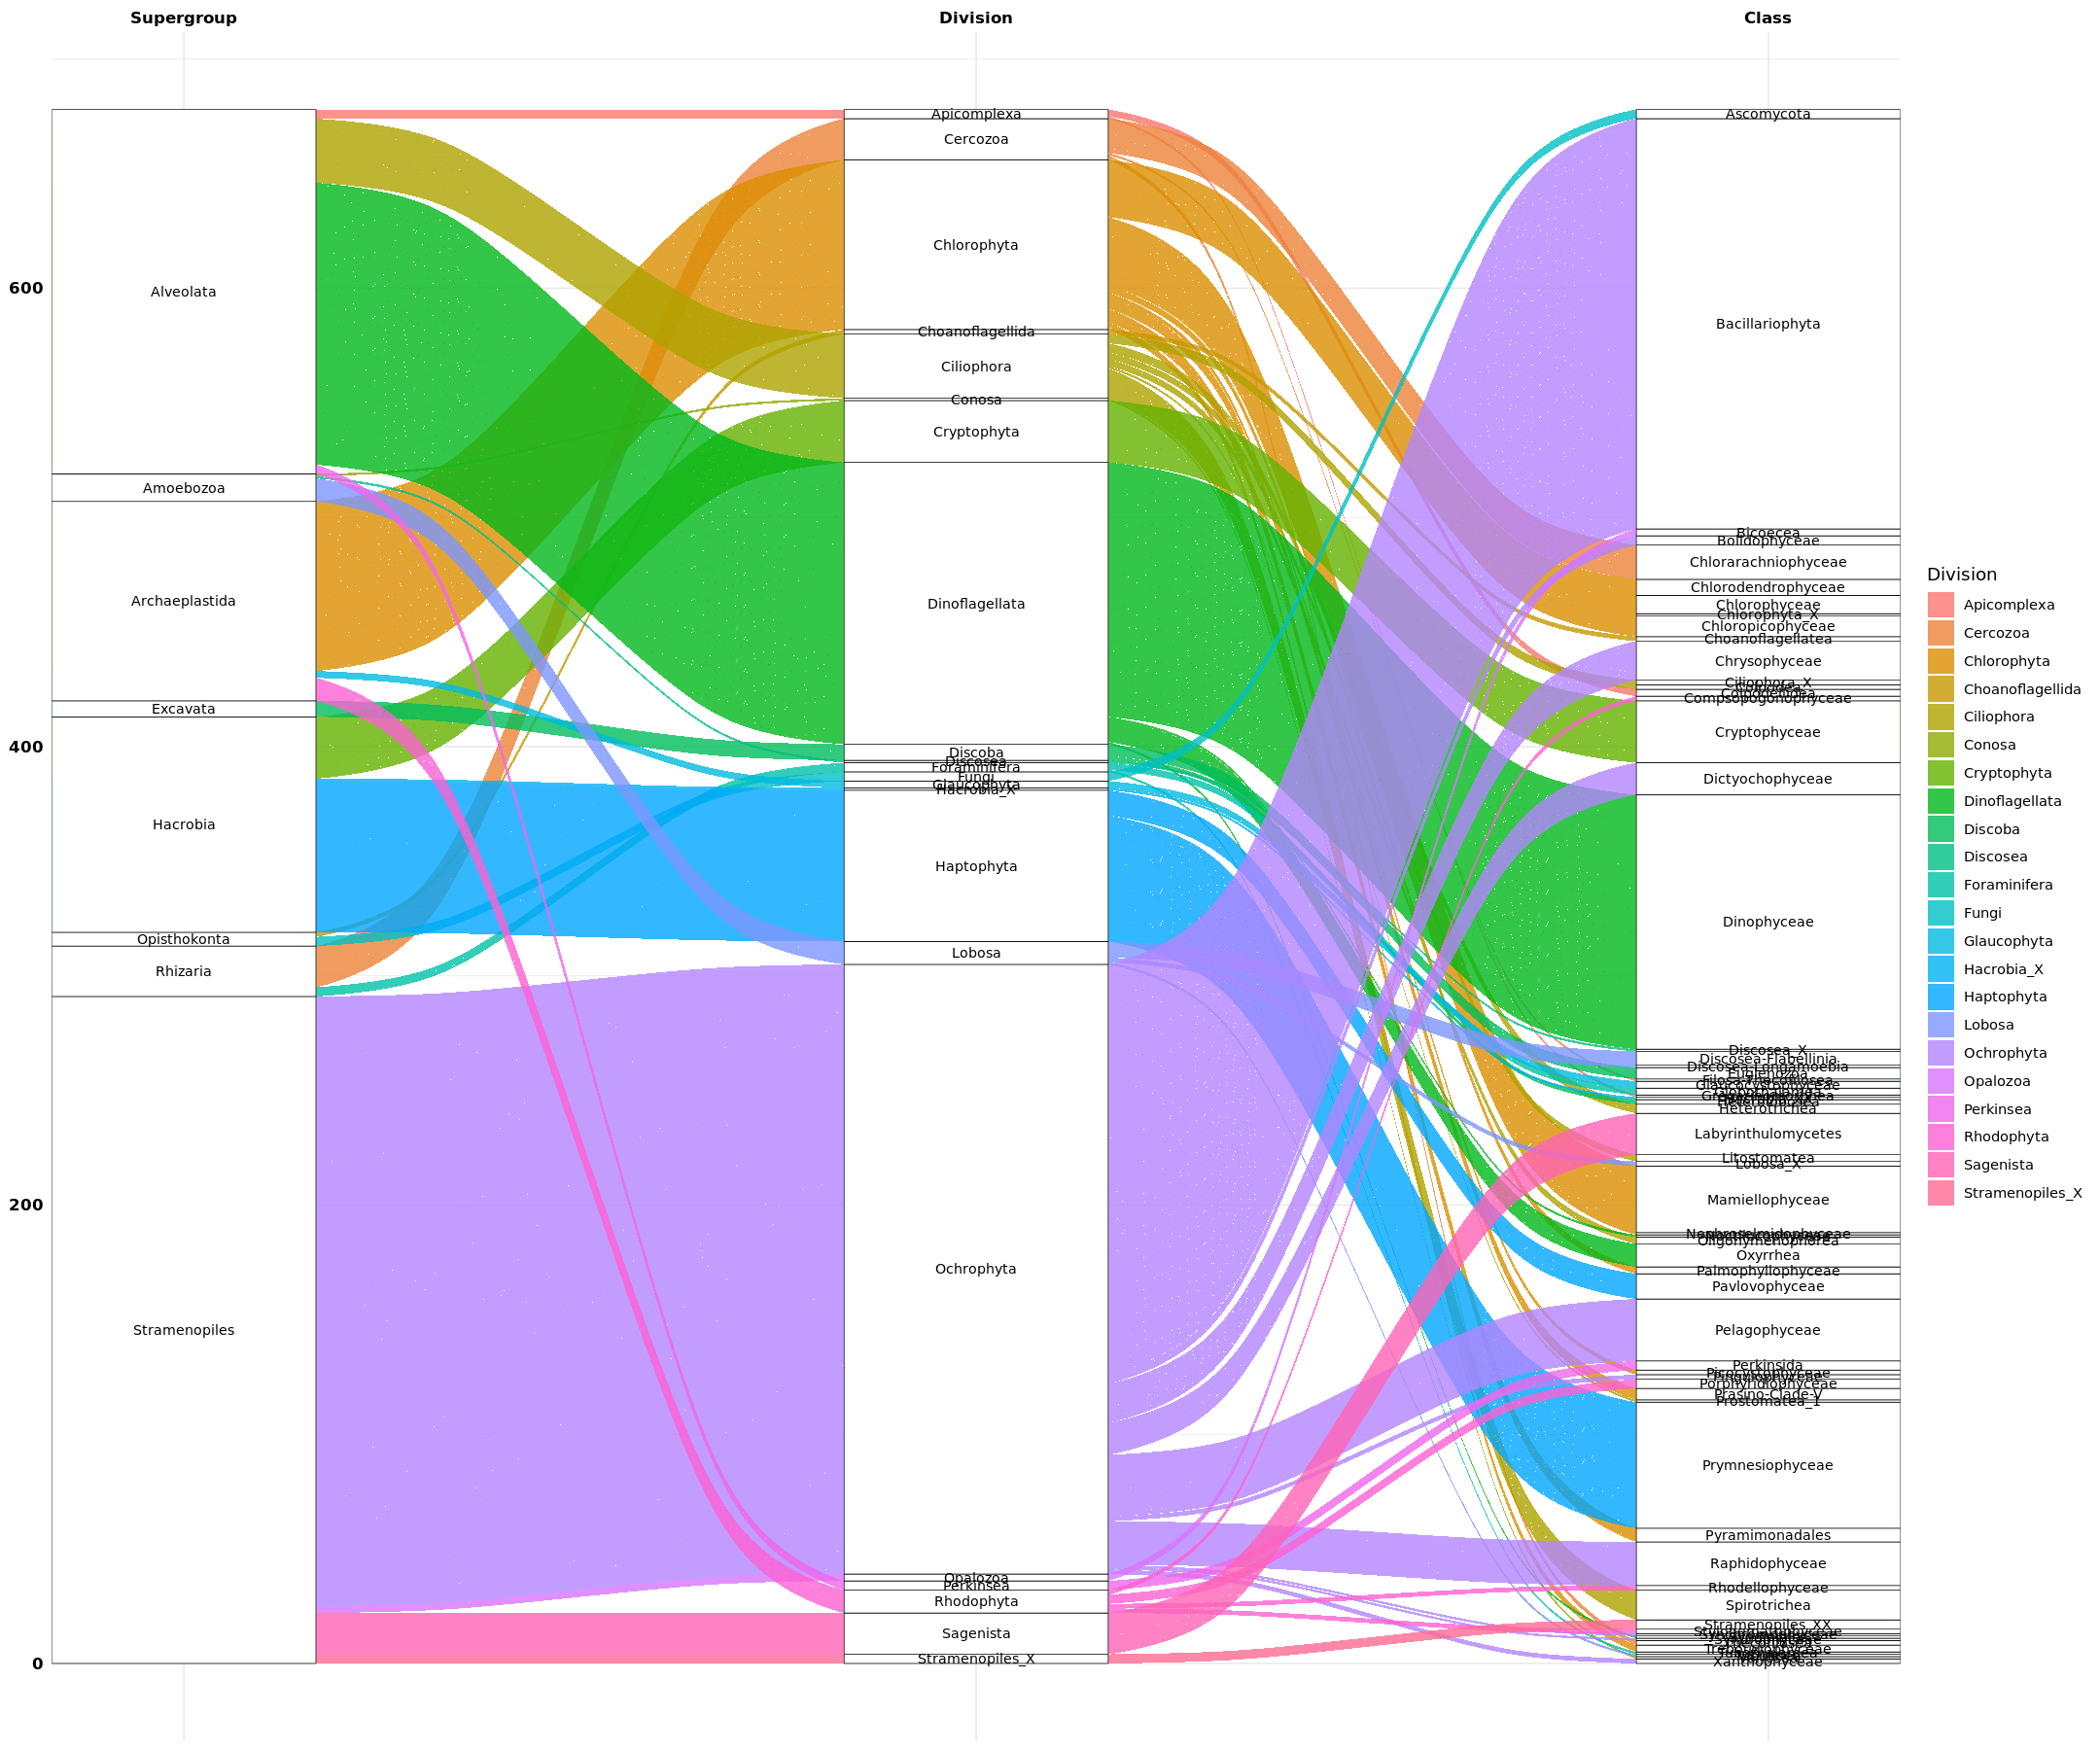

In [16]:
# Plot mmetsp representation
options(repr.plot.width = 18, repr.plot.height = 15) # Set plot output space
ggplot(mmetsp_plot, aes(axis1 = Supergroup, axis2 = Division, axis3 = Class)) +
    scale_x_discrete(limits = c("Supergroup", "Division", "Class"), expand = c(.05, .05), position = "top") +
    geom_alluvium(aes(fill = Division), alpha = 0.8) +
    geom_stratum(size = 0.2) +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
    theme_minimal() +
    theme(axis.text = element_text(color = "black", size = 10, face = "bold")) +
    guides(fill=guide_legend(ncol=1))

`summarise()` ungrouping output (override with `.groups` argument)


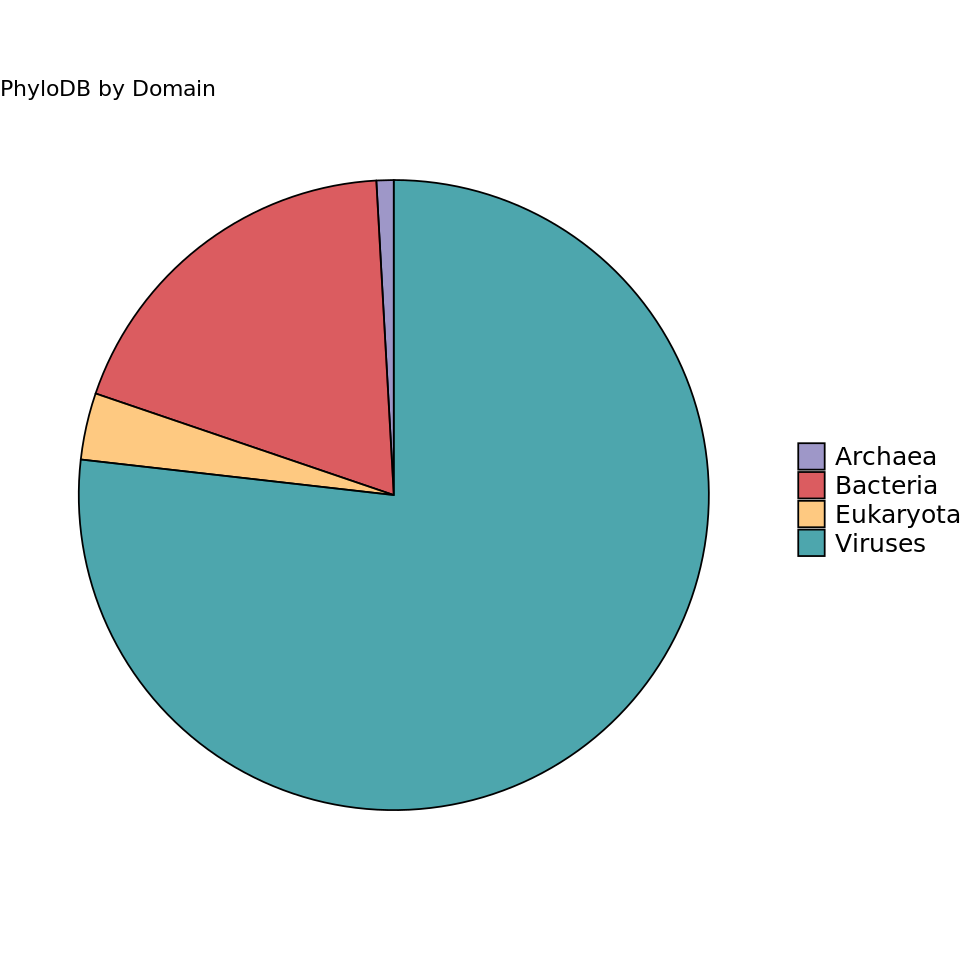

In [18]:
## PhyloDB
# Pie chart of Domain distribution
options(repr.plot.width = 8, repr.plot.height = 8) # Set plot output space
phylodb %>% 
    select(Supergroup) %>% 
    add_column(freq = 1) %>% 
    group_by(Supergroup) %>% 
    summarise(FREQ = sum(freq)) %>% 
    pivot_longer(cols = c(Supergroup), names_to = "LEVELS") %>%
        ggplot(aes(x = LEVELS, fill = value, y = FREQ)) +
            geom_bar(stat = "identity", position = "stack", color = "black", alpha = 0.7) +
            scale_fill_manual(values = c("#756bb1", "#cb181d", "#feb24c", "#02818a")) +
            coord_polar("y", start = 0) +
            theme_void() +
            theme(legend.title = element_blank(),
                 legend.text = element_text(size = 15)) +
            labs(title = "PhyloDB by Domain")

`summarise()` ungrouping output (override with `.groups` argument)


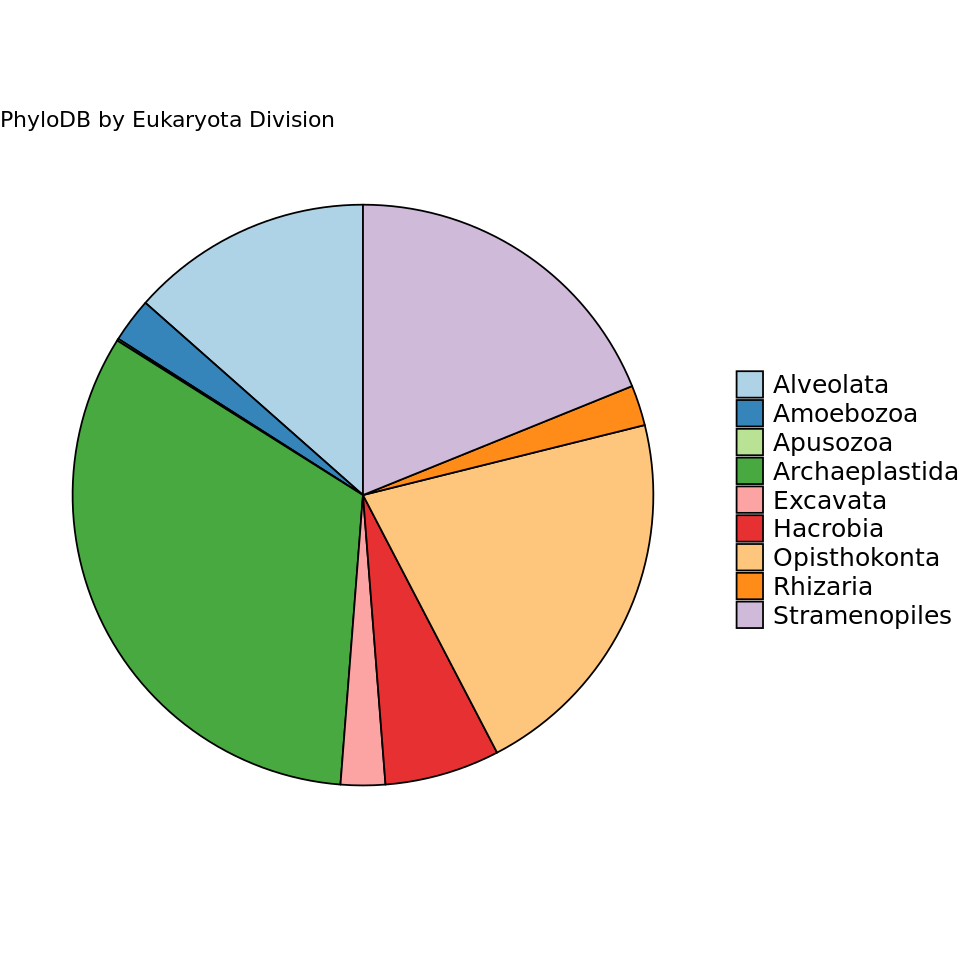

In [20]:
# Pie chart of Eukaryotic distribution within phylodb
options(repr.plot.width = 8, repr.plot.height = 8) # Set plot output space
phylodb %>% 
    filter(Supergroup == "Eukaryota") %>% 
    select(Division) %>% 
    add_column(freq = 1) %>% 
    group_by(Division) %>% 
    summarise(FREQ = sum(freq)) %>% 
    pivot_longer(cols = c(Division), names_to = "LEVELS") %>%
        ggplot(aes(x = LEVELS, fill = value, y = FREQ)) +
            geom_bar(stat = "identity", position = "stack", color = "black", alpha = 0.9) +
            scale_fill_brewer(palette = "Paired") +
            coord_polar("y", start = 0) +
            theme_void() +
            theme(legend.title = element_blank(),
                 legend.text = element_text(size = 15)) +
            labs(title = "PhyloDB by Eukaryota Division")

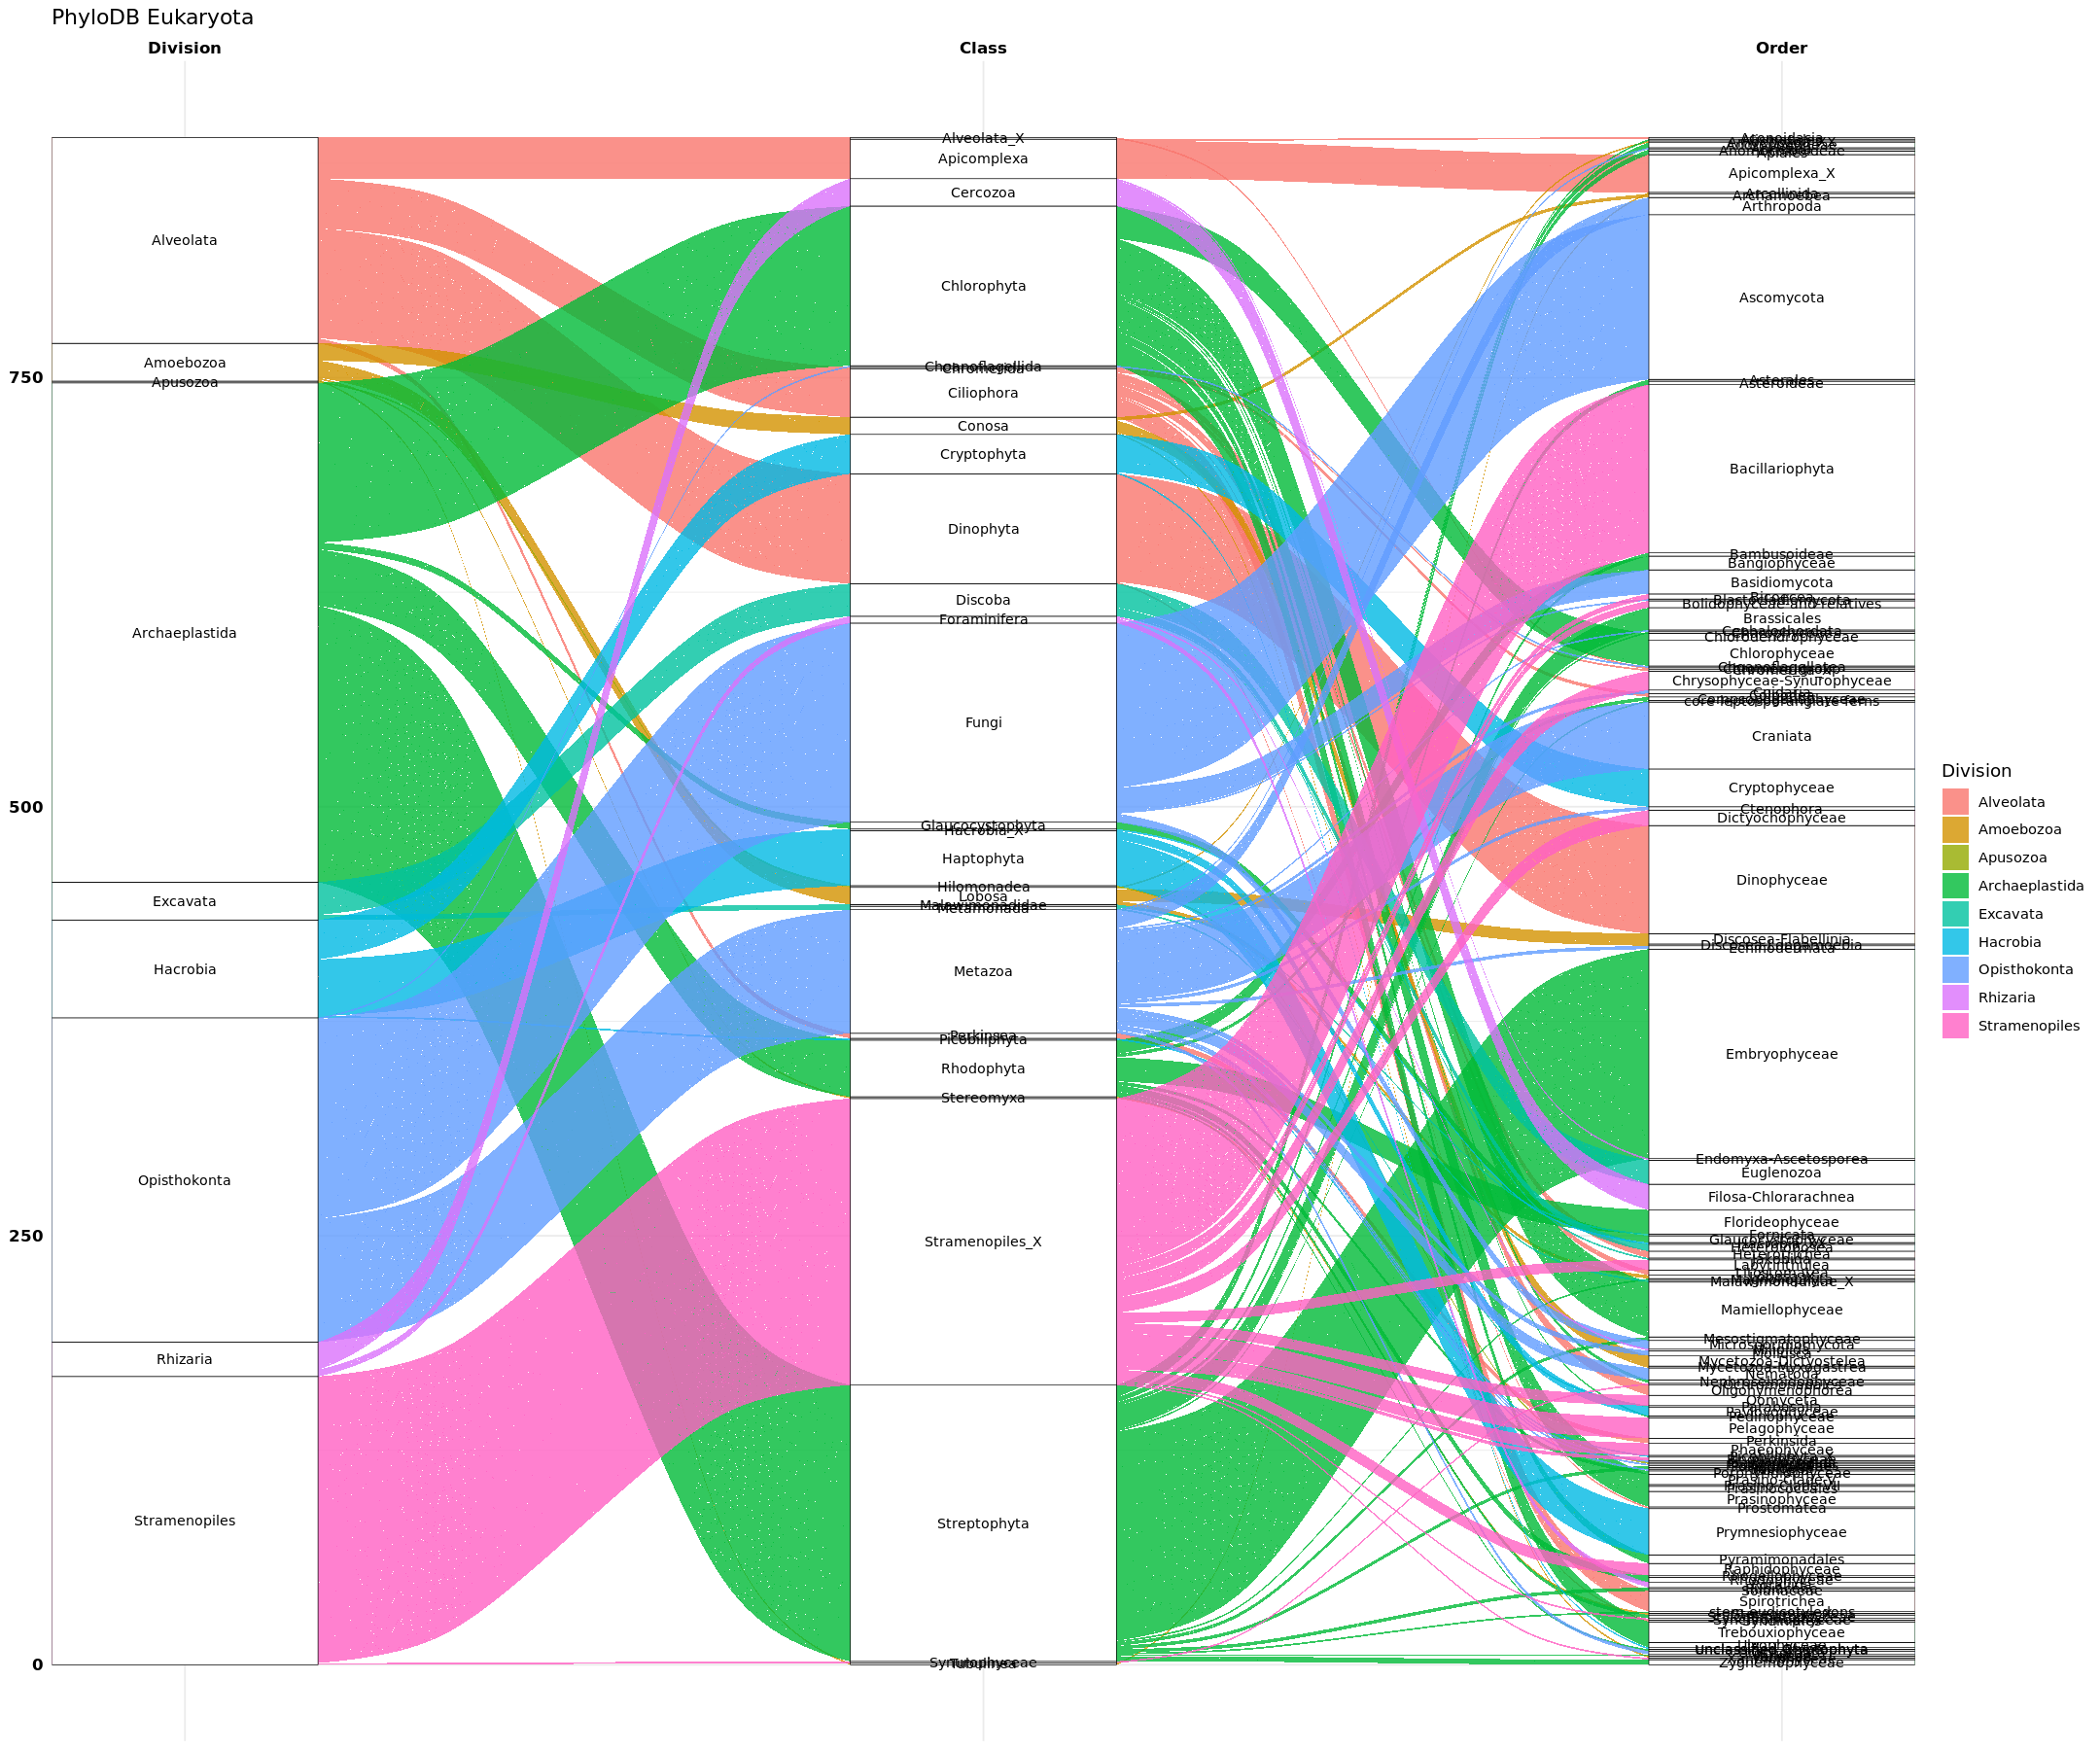

In [21]:
# PhyloDB - alluvial?
## Alluvial plot of phylaDB distribution by taxonomic group - Eukaryota
options(repr.plot.width = 18, repr.plot.height = 15) # Set plot output space
phylodb %>% 
    filter(Supergroup == "Eukaryota") %>% 
    ggplot(aes(axis1 = Division, axis2 = Class, axis3 = Order)) +
    scale_x_discrete(limits = c("Division", "Class", "Order"), expand = c(.05, .05), position = "top") +
    geom_alluvium(aes(fill = Division), alpha = 0.8) +
    geom_stratum(size = 0.2) +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
    theme_minimal() +
    theme(axis.text = element_text(color = "black", size = 10, face = "bold")) +
    labs(title = "PhyloDB Eukaryota")

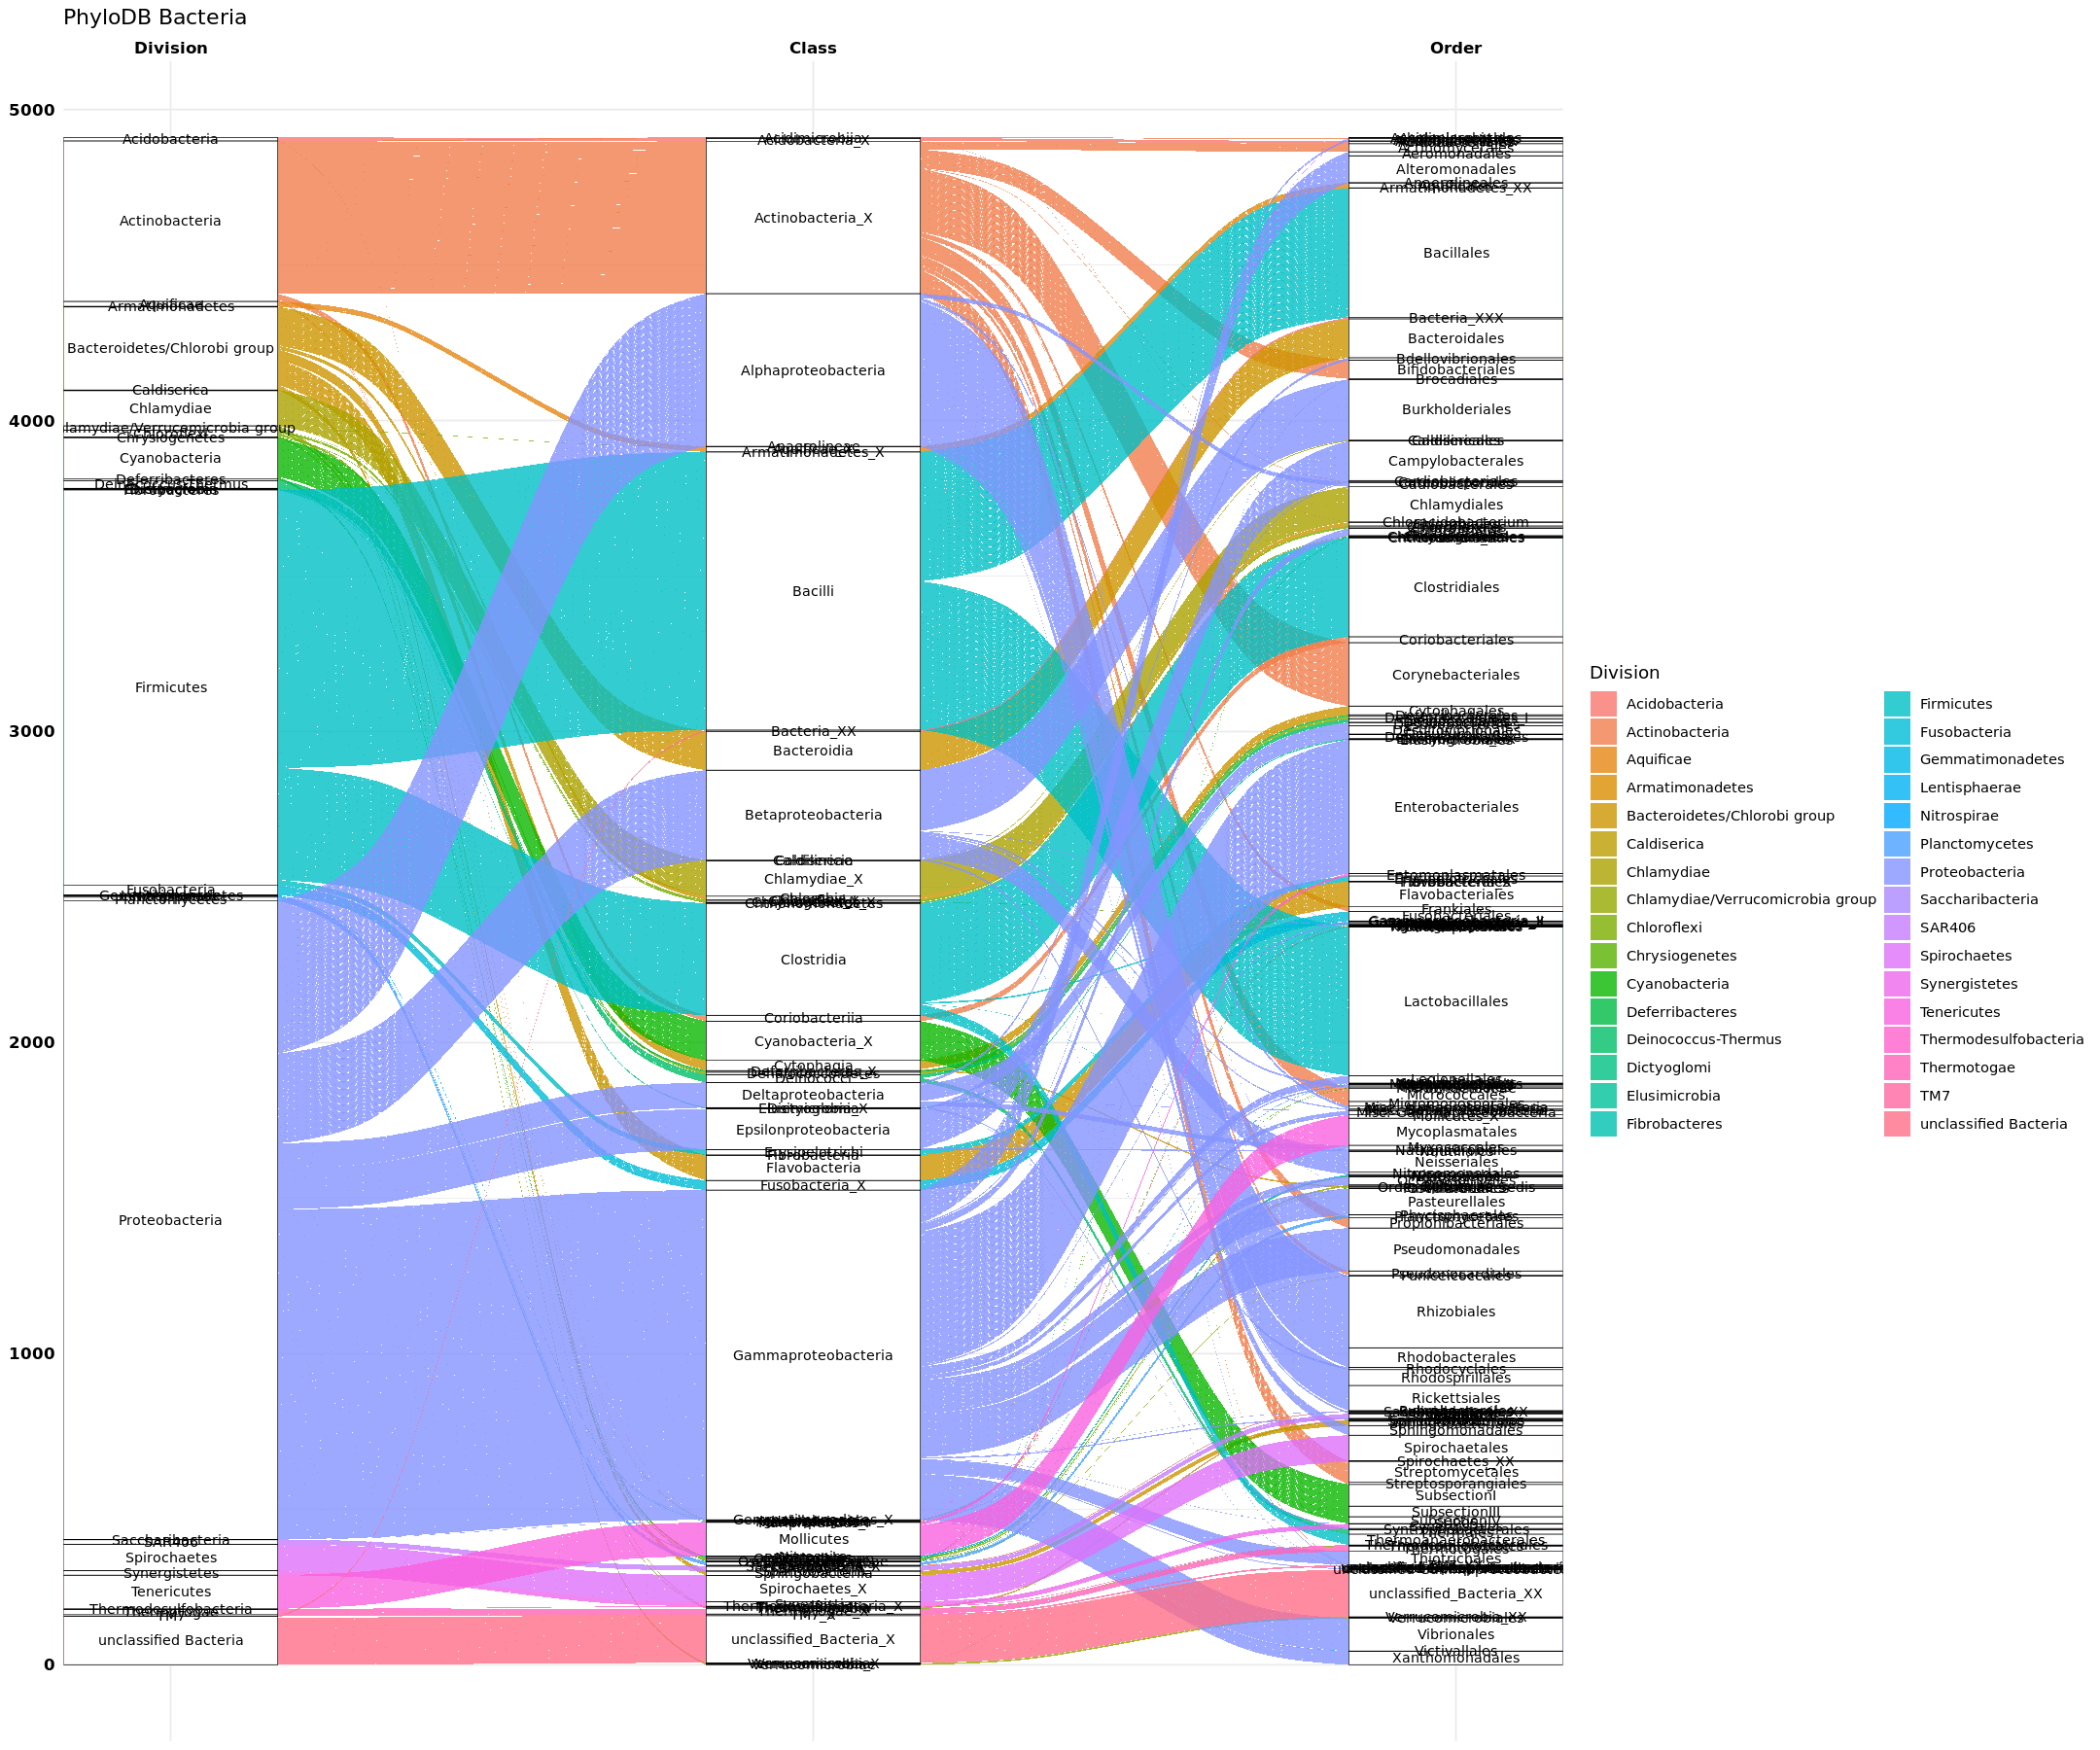

In [22]:
## Alluvial plot of phylaDB distribution by taxonomic group - Bacteria
options(repr.plot.width = 18, repr.plot.height = 15) # Set plot output space
phylodb %>% 
    filter(Supergroup == "Bacteria") %>% 
    ggplot(aes(axis1 = Division, axis2 = Class, axis3 = Order)) +
    scale_x_discrete(limits = c("Division", "Class", "Order"), expand = c(.05, .05), position = "top") +
    geom_alluvium(aes(fill = Division), alpha = 0.8) +
    geom_stratum(size = 0.2) +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
    theme_minimal() +
    theme(axis.text = element_text(color = "black", size = 10, face = "bold")) +
    labs(title = "PhyloDB Bacteria")

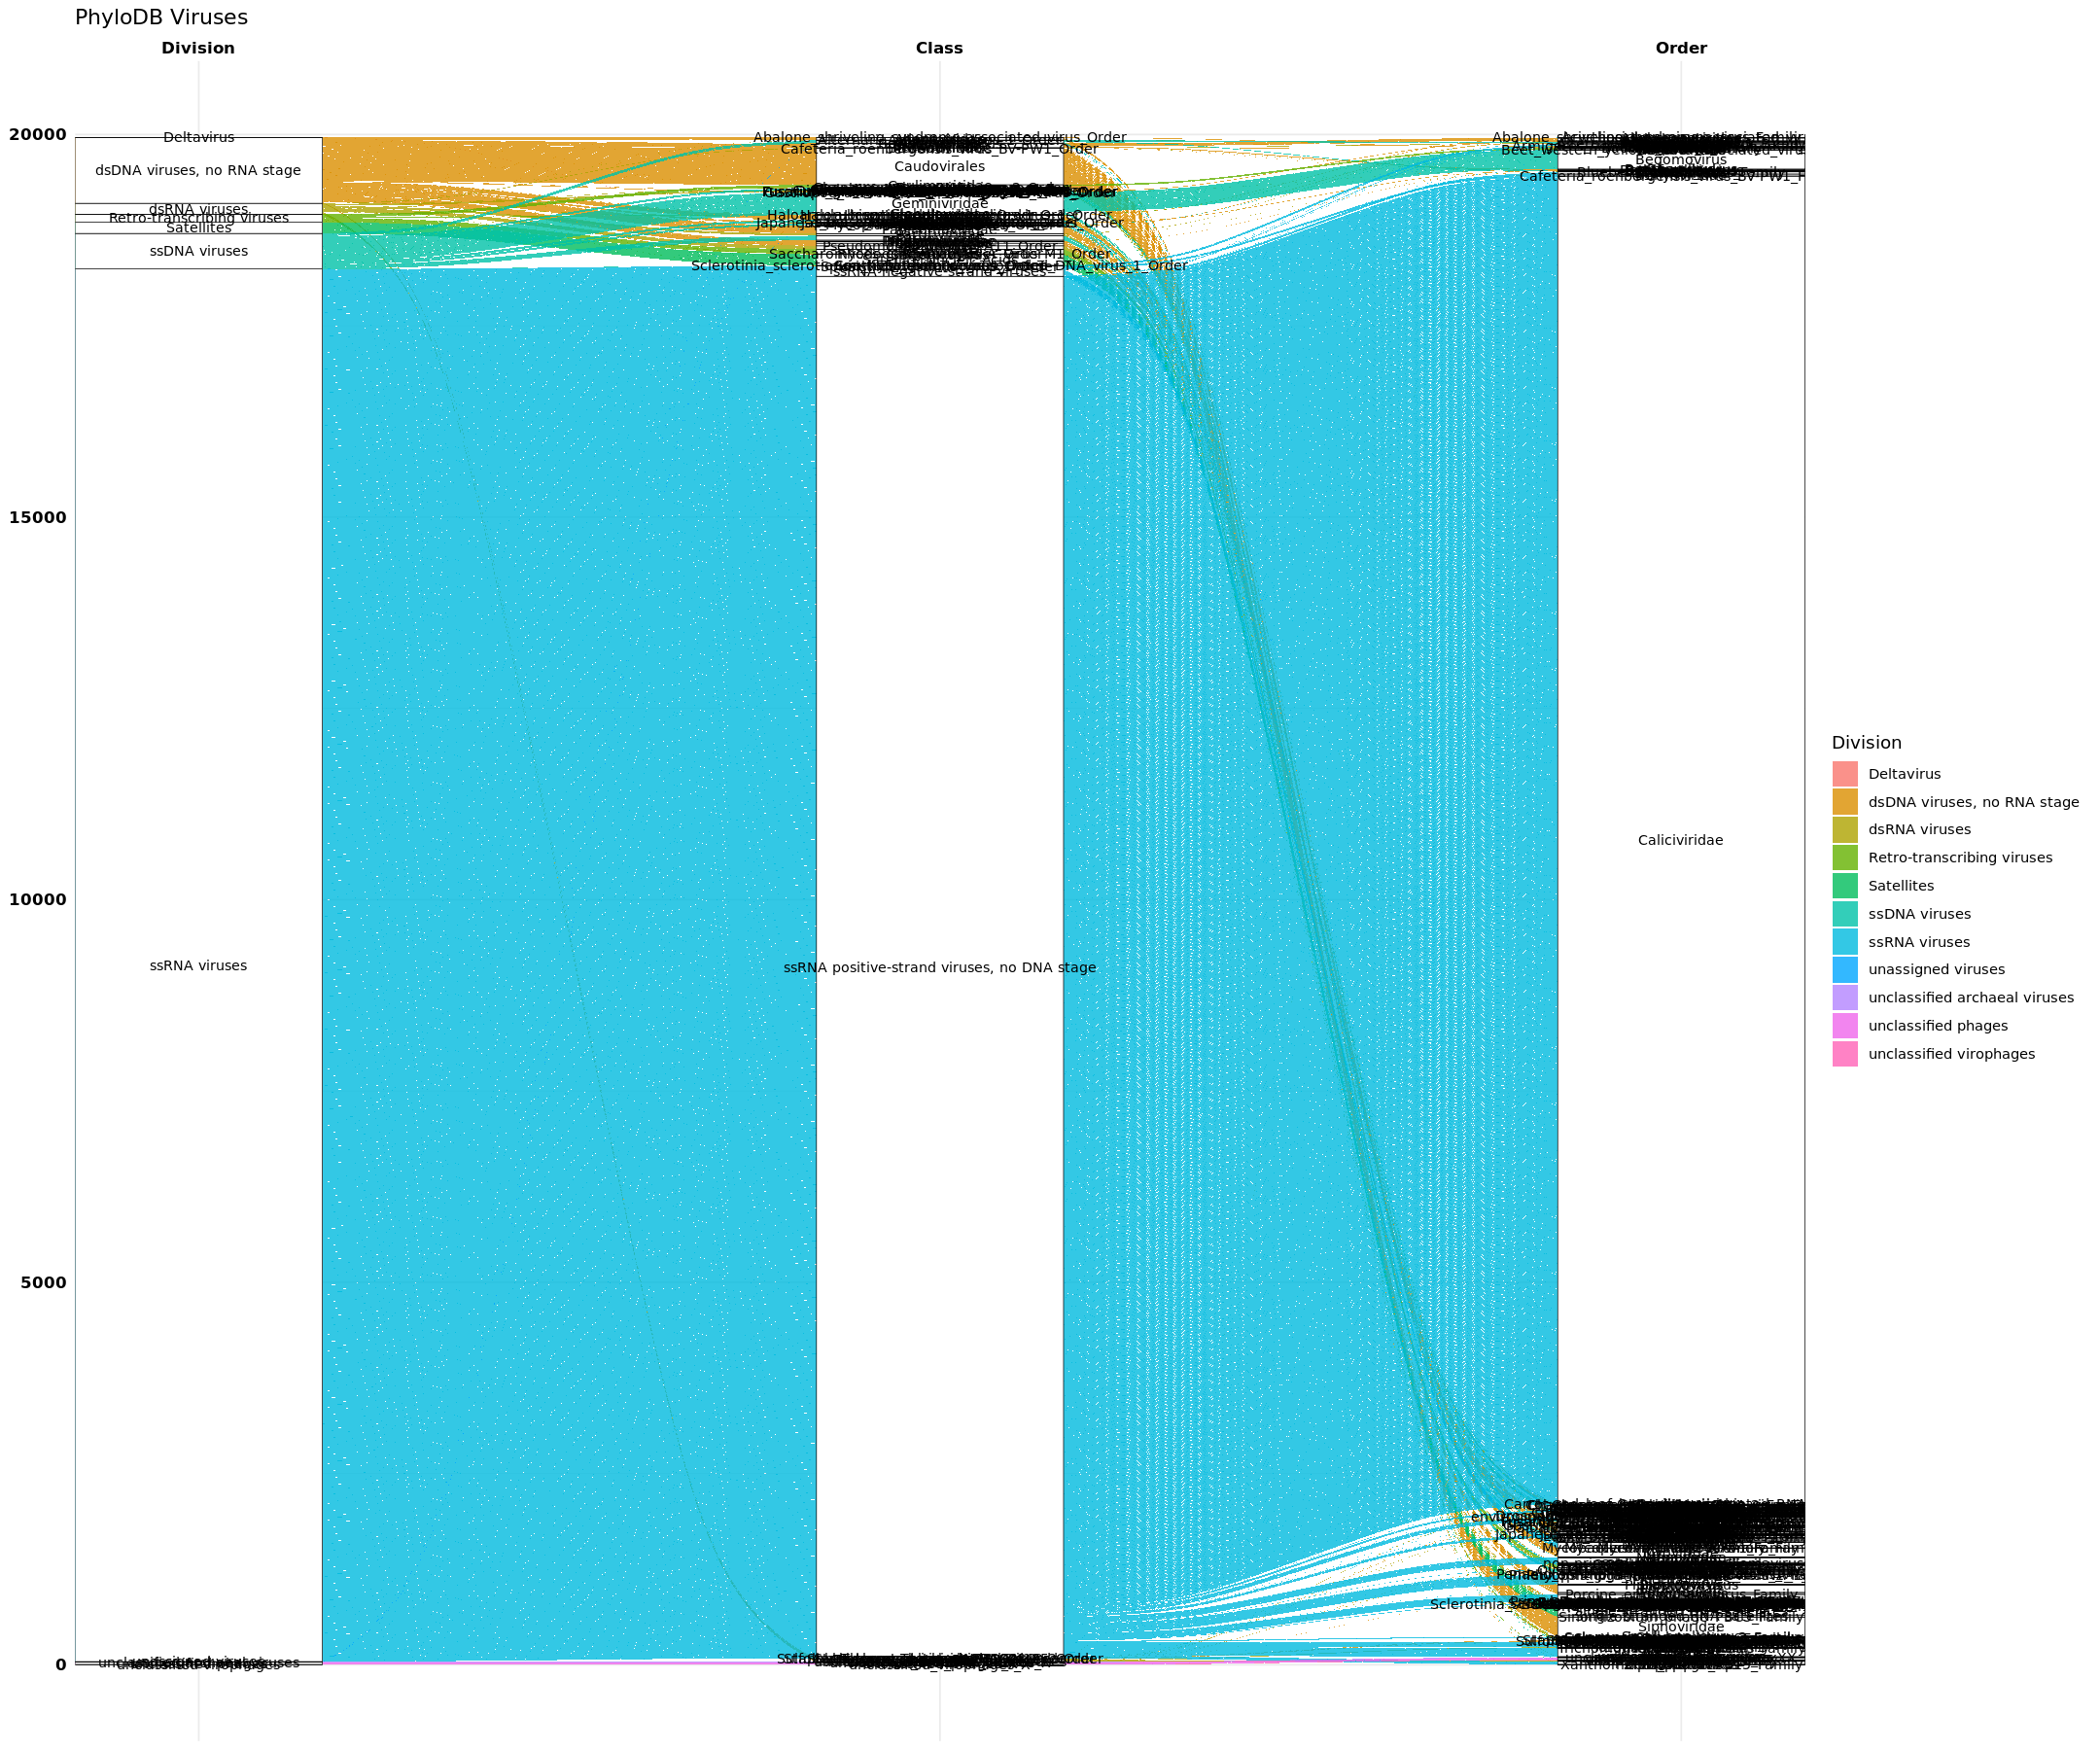

In [23]:
## Alluvial plot of phylaDB distribution by taxonomic group - Viruses
options(repr.plot.width = 18, repr.plot.height = 15) # Set plot output space
phylodb %>% 
    filter(Supergroup == "Viruses") %>% 
    ggplot(aes(axis1 = Division, axis2 = Class, axis3 = Order)) +
    scale_x_discrete(limits = c("Division", "Class", "Order"), expand = c(.05, .05), position = "top") +
    geom_alluvium(aes(fill = Division), alpha = 0.8) +
    geom_stratum(size = 0.2) +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
    theme_minimal() +
    theme(axis.text = element_text(color = "black", size = 10, face = "bold")) +
    labs(title = "PhyloDB Viruses")

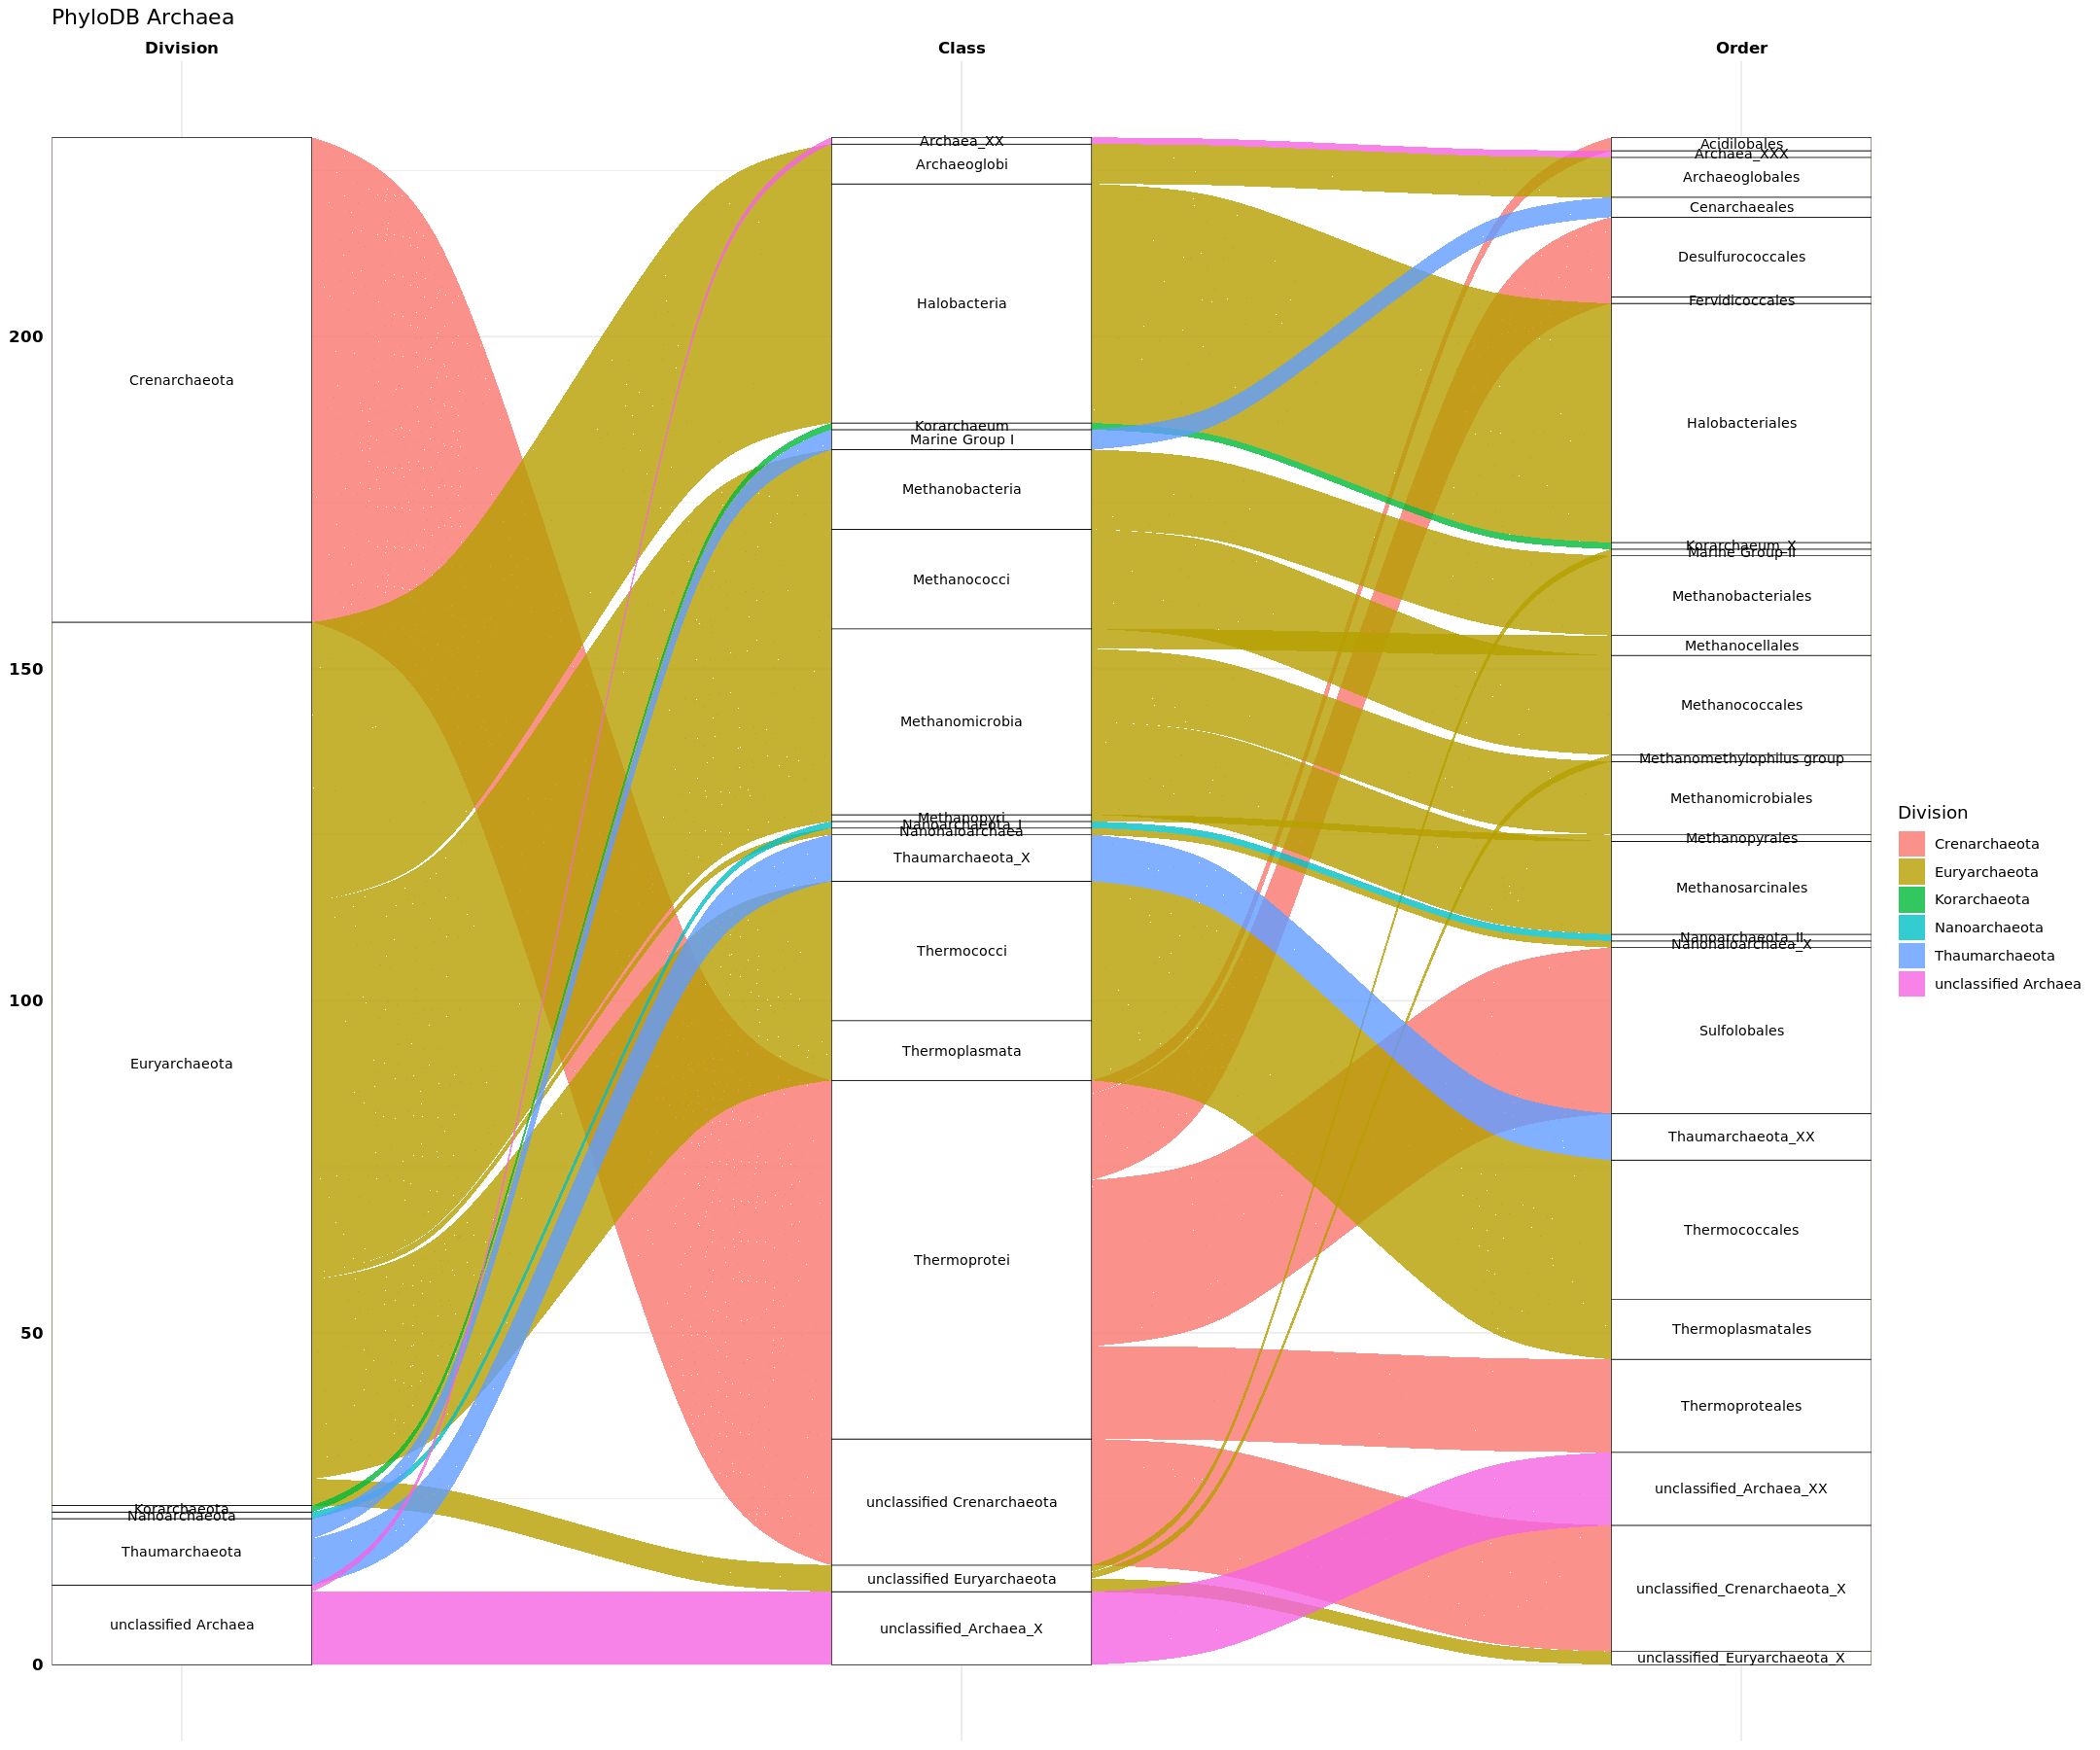

In [24]:
## Alluvial plot of phylaDB distribution by taxonomic group - Archaea
options(repr.plot.width = 18, repr.plot.height = 15) # Set plot output space
phylodb %>% 
    filter(Supergroup == "Archaea") %>% 
    ggplot(aes(axis1 = Division, axis2 = Class, axis3 = Order)) +
    scale_x_discrete(limits = c("Division", "Class", "Order"), expand = c(.05, .05), position = "top") +
    geom_alluvium(aes(fill = Division), alpha = 0.8) +
    geom_stratum(size = 0.2) +
    geom_text(stat = "stratum", aes(label = after_stat(stratum)), size = 3) +
    theme_minimal() +
    theme(axis.text = element_text(color = "black", size = 10, face = "bold")) +
    labs(title = "PhyloDB Archaea")

In [28]:
# Euk Zoo
head(eukzoo)

Source_ID,Strain,Supergroup,Phylum,Class,Order,Family,Genus,Species,Notes
MMETSP0290,CCMP2878,Alveolate,Apicomplexa,Chromerida,Chromeraceae,Incertae sedis,Chromera,Chromera velia,Archibald 2018
AddRef0046,CCMP3155,Alveolate,Apicomplexa,Chromerida,Vitrellaceae,Incertae sedis,Vitrella,Vitrella brassicaformis,Archibald 2018
MMETSP0288,CCMP3155,Alveolate,Apicomplexa,Chromerida,Vitrellaceae,Incertae sedis,Vitrella,Vitrella brassicaformis,Archibald 2018
MMETSP1451,CCMP3346,Alveolate,Apicomplexa,Chromerida,Vitrellaceae,Incertae sedis,Vitrella,Vitrella brassicaformis,Archibald 2018
MMETSP0372,Grappler Inlet BC,Alveolate,Apicomplexa,Conoidasida,Incertae sedis,Incertae sedis,Lankesteria,Lankesteria abbottii,Archibald 2018
MMETSP0125,ATCC 50986,Alveolate,Ciliate,Colpodea,Cyrtolophosidida,Cyrtolophosidae,Aristerostoma,Aristerostoma sp.,Lynn 2008 (p 365)


`summarise()` ungrouping output (override with `.groups` argument)


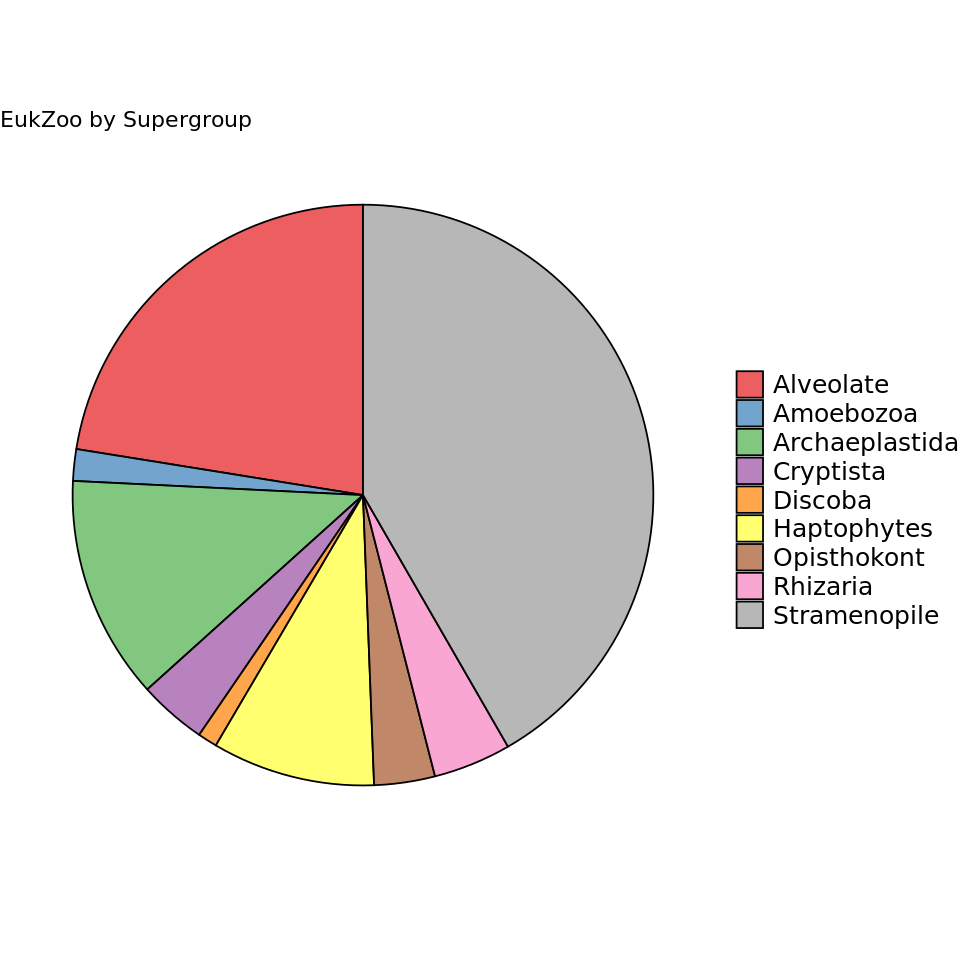

In [33]:
# Pie chart of 
options(repr.plot.width = 8, repr.plot.height = 8) # Set plot output space
eukzoo %>% 
    select(Supergroup) %>% 
    add_column(freq = 1) %>% 
    group_by(Supergroup) %>% 
    summarise(FREQ = sum(freq)) %>% 
    pivot_longer(cols = c(Supergroup), names_to = "LEVELS") %>%
        ggplot(aes(x = LEVELS, fill = value, y = FREQ)) +
            geom_bar(stat = "identity", position = "stack", color = "black", alpha = 0.7) +
            scale_fill_manual(values = c("#e41a1c","#377eb8","#4daf4a","#984ea3",
                                         "#ff7f00","#ffff33","#a65628","#f781bf","#999999")) +
#             scale_fill_brewer(palette = "Accent") +
            coord_polar("y", start = 0) +
            theme_void() +
            theme(legend.title = element_blank(),
                 legend.text = element_text(size = 15)) +
            labs(title = "EukZoo by Supergroup")

`summarise()` ungrouping output (override with `.groups` argument)


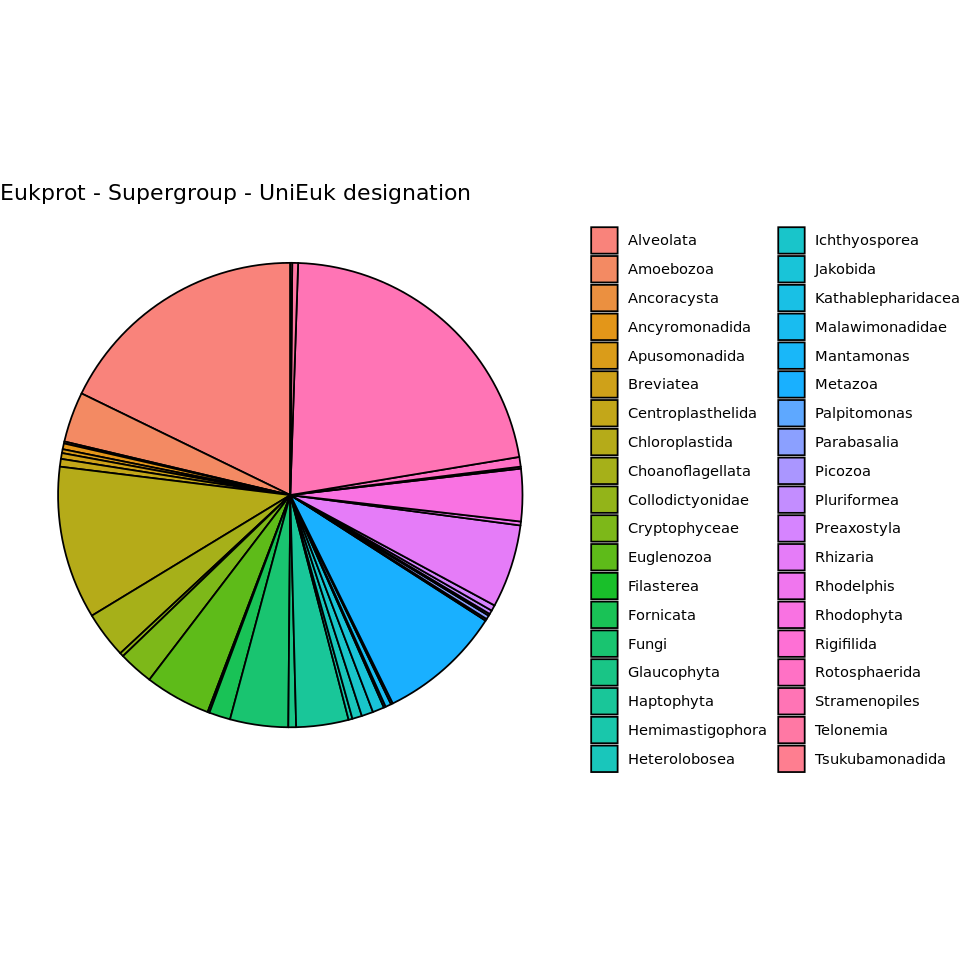

In [25]:
# Eukprot
# Pie chart of Eukprot supergroup
options(repr.plot.width = 8, repr.plot.height = 8) # Set plot output space
eukprot %>% 
    select(Supergroup_UniEuk) %>% 
    add_column(freq = 1) %>% 
    group_by(Supergroup_UniEuk) %>% 
    summarise(FREQ = sum(freq)) %>% 
    pivot_longer(cols = c(Supergroup_UniEuk), names_to = "LEVELS") %>%
        ggplot(aes(x = LEVELS, fill = value, y = FREQ)) +
            geom_bar(stat = "identity", position = "stack", color = "black", alpha = 0.9) +
            coord_polar("y", start = 0) +
            theme_void() +
            theme(legend.title = element_blank()) +
            labs(title = "Eukprot - Supergroup - UniEuk designation")

Warning message:
“Expected 6 pieces. Additional pieces discarded in 704 rows [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, ...].”Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 12 rows [3, 29, 162, 163, 320, 647, 648, 687, 688, 689, 690, 732].”`summarise()` ungrouping output (override with `.groups` argument)


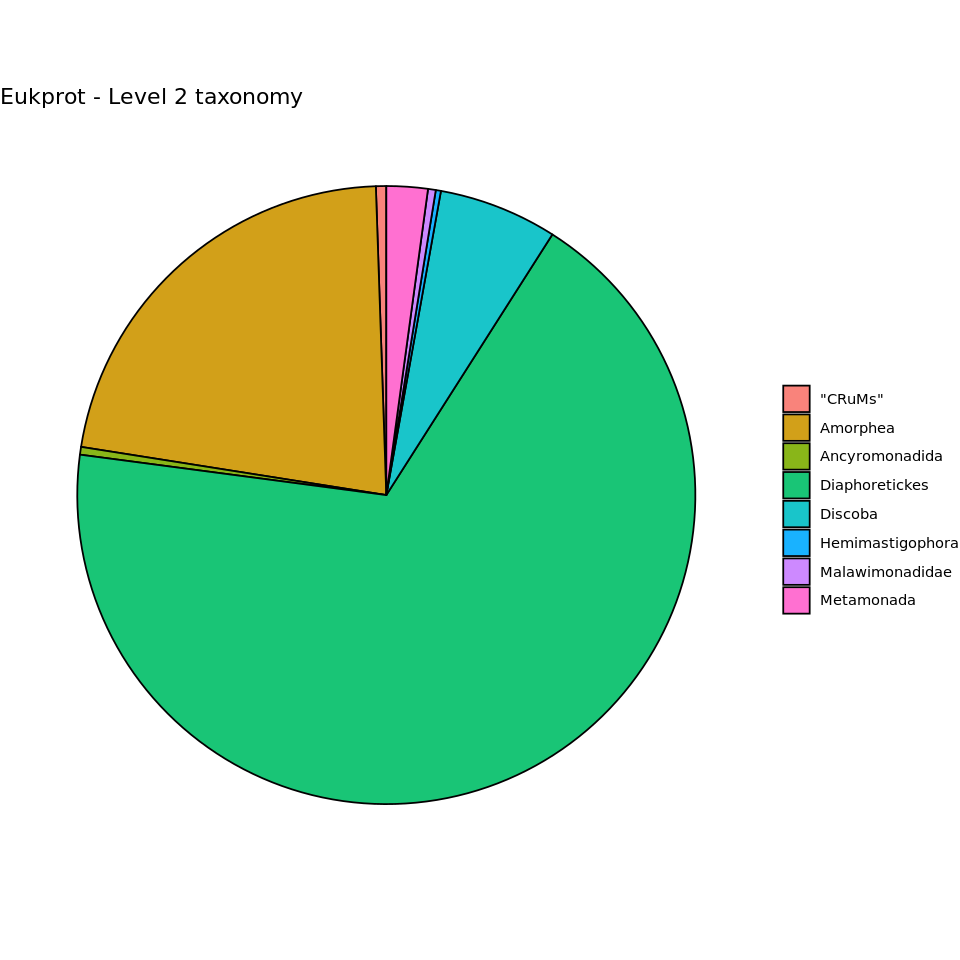

In [26]:
eukprot %>% 
    separate(Taxonomy_UniEuk, c("ONE", "TWO", "THREE", "FOUR", "FIVE", "SIX"), sep = ";") %>% 
    select(TWO) %>% 
    add_column(freq = 1) %>% 
    group_by(TWO) %>% 
    summarise(FREQ = sum(freq)) %>% 
    pivot_longer(cols = c(TWO), names_to = "LEVELS") %>%
        ggplot(aes(x = LEVELS, fill = value, y = FREQ)) +
            geom_bar(stat = "identity", position = "stack", color = "black", alpha = 0.9) +
            coord_polar("y", start = 0) +
            theme_void() +
            theme(legend.title = element_blank()) +
            labs(title = "Eukprot - Level 2 taxonomy") 